# Ejercicios
1. Probar los primos de Mersenne con todas vistas: apply y map
2. Verificar métodos lowbalance para mejorar lo calculos
3. all o np.all
4. reemplazar lista: np.array([x%i for i in np.arange(int(x**0.5)+1)[2:]])
5. calculcar residuos creada con numpy utilizando todos los motores
6. utilizar map para: 
    for med in np.arange(12,20):
    print np.mod(np.arange(24), med)
7. graficar tiempos con y sin vistas
8. aproximación del número pi usando Monte Carlo

In [1]:
import numpy as np
import ipyparallel as ipp
import matplotlib.pyplot as plt
c = ipp.Client()
dview = c[:]

####  1. Probar los primos de Mersenne con todas vistas: apply y map

##### Prime implementando for

In [2]:
def PrimeQ0(x):
    import numpy as np
    return all(x%i for i in np.arange(int(x**0.5)+1)[2:])
PrimeQ0(5), PrimeQ0(31), PrimeQ0(60), PrimeQ0(61)

(True, True, False, True)

* Tiempo para Prime con for - Map_sync

In [5]:
%timeit list = dview.map_sync(PrimeQ0, 2**np.arange(25)-1)
lista1 = []
for i in np.arange(25)[2:]:
    if list[i] == True:
        lista1.append(i)
        print lista1

10 loops, best of 3: 50.2 ms per loop
[2]
[2, 3]
[2, 3, 5]
[2, 3, 5, 7]
[2, 3, 5, 7, 13]
[2, 3, 5, 7, 13, 17]
[2, 3, 5, 7, 13, 17, 19]


* Tiempo para Prime con for - Apply_sync

In [7]:
%timeit c[3].apply_sync(PrimeQ0, 25)
lista1 = []
for i in np.arange(25)[2:]:
    if list[i] == True:
        lista1.append(i)
        print lista1

100 loops, best of 3: 14.6 ms per loop
[2]
[2, 3]
[2, 3, 5]
[2, 3, 5, 7]
[2, 3, 5, 7, 13]
[2, 3, 5, 7, 13, 17]
[2, 3, 5, 7, 13, 17, 19]


#### Prime implementado con numpy

In [8]:
def PrimeQ2(x):
    import numpy as np
    lista = np.arange(np.int(x**0.5)+1)[2:]
    residuos = np.mod(x, lista)
    return np.all(residuos)
PrimeQ2(5), PrimeQ2(31), PrimeQ2(60), PrimeQ2(61)

(True, True, False, True)

* Tiempo para Prime con np - Map_sync

In [9]:
%timeit list = dview.map_sync(PrimeQ2, 2**np.arange(25)-1)
lista1 = []
for i in np.arange(25)[2:]:
    if list[i] == True:
        lista1.append(i)
        print lista1

10 loops, best of 3: 48.1 ms per loop
[2]
[2, 3]
[2, 3, 5]
[2, 3, 5, 7]
[2, 3, 5, 7, 13]
[2, 3, 5, 7, 13, 17]
[2, 3, 5, 7, 13, 17, 19]


* Tiempo para Prime con np - Apply_sync

In [10]:
%timeit c[3].apply_sync(PrimeQ2, 25)
lista1 = []
for i in np.arange(25)[2:]:
    if list[i] == True:
        lista1.append(i)
        print lista1

100 loops, best of 3: 14.3 ms per loop
[2]
[2, 3]
[2, 3, 5]
[2, 3, 5, 7]
[2, 3, 5, 7, 13]
[2, 3, 5, 7, 13, 17]
[2, 3, 5, 7, 13, 17, 19]


#### 2. Verificar métodos _Load balanced_ para mejorar lo calculos

Administra la distribucion de tareas y es útil cuando se tienen muchas tareas que toman diferentes tiempos para ejecutarse.<br> Es decir, si se tiene un trabajo y da cada motor una parte igual, algunos motores pueden terminar más rápido y luego no hacer nada. Un mejor enfoque consiste en asignar el trabajo a cada motor apenas termine. De esta manera el trabajo se carga equilibrada sobre el clúster y se completará el proceso anterior.<br>
ipyparallel proporciona el LoadBalancedView para cada caso de uso exacto.<br>
Load_balance_view es útil si se ejecutan las tareas una por una o si las tareas toman una cantidad variable de tiempo.

##### LoadBalanceView y DirectView
LoadBalancedView se ejecuta en cualquier motor <br>
DirectView: tiene una ejecución directa en todos los motores<br>
Más información: <a href"http://ipython.org/ipython-doc/rel-0.11/ipython.pdf"> Python Documentation</a> Creación de instancia cliente y uso de LoadBalanceView en pag. 124

#### 3. All o np.all

* All: Devuelve True si bool (x) es True para todos los valores x en el iterable.Si la iterable está vacía, devuelva True.<br>
* Np.all: Devuelve True solo si todos los valores son True, a menos que se especifique `out`, en cuyo caso se devuelve una referencia a `out`.<br>

In [11]:
np.all([[True,True],[True,True]])

True

In [12]:
np.all([[True,True],[True,False]])

False

In [13]:
np.all([[False,True],[True,True]], axis=0)

array([False,  True], dtype=bool)

#### 4. Reemplazar por mod y quitar for de la lista : np.array([x%i for i in np.arange(int(x**0.5)+1)[2:]])

In [14]:
def PrimeQ1(x):
    import numpy as np
    return np.all(np.array([x%i for i in np.arange(int(x**0.5)+1)[2:]]))
PrimeQ1(7)

True

In [15]:
def PrimeQ1(x):
    import numpy as np
    lista1 = np.arange(np.int(x**0.5)+1)[2:] 
    return np.all(np.array(np.mod(x, lista1)))
PrimeQ1(7)

True

#### 5. Calculcar residuos creados con numpy utilizando todos los motores

In [16]:
def PrimeQ2(x):
    import numpy as np
    lista = np.arange(np.int(x**0.5)+1)[2:]
    residuos = np.mod(x, lista)
    return np.all(residuos)
%timeit dview.map_sync(PrimeQ2, np.arange(10))

10 loops, best of 3: 49.8 ms per loop


#### 6. Utilizar map para: 
_for med in np.arange(12,20):<br>
print np.mod(np.arange(24), med)_

In [17]:
def funct1():
    for med in np.arange(12,20):
        print np.mod(np.arange(24), med)
%timeit dview.map_sync(funct1(), np.arange(10))

[ 0  1  2  3  4  5  6  7  8  9 10 11  0  1  2  3  4  5  6  7  8  9 10 11]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12  0  1  2  3  4  5  6  7  8  9 10]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13  0  1  2  3  4  5  6  7  8  9]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14  0  1  2  3  4  5  6  7  8]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15  0  1  2  3  4  5  6  7]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16  0  1  2  3  4  5  6]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17  0  1  2  3  4  5]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18  0  1  2  3  4]
[ 0  1  2  3  4  5  6  7  8  9 10 11  0  1  2  3  4  5  6  7  8  9 10 11]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12  0  1  2  3  4  5  6  7  8  9 10]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13  0  1  2  3  4  5  6  7  8  9]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14  0  1  2  3  4  5  6  7  8]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15  0  1  2  3  4  5  6  7]
[ 0  1  2  3  4  5  6  7  8  9 10 11 1

#### 7. Graficar tiempos con y sin vistas 

### PrimeQ0 con apply

In [18]:
def PrimeQ0(x):
    import numpy as np
    return all(x%i for i in np.arange(int(x**0.5)+1)[2:])

In [19]:
from time import time
lista1 = []
for i in np.arange(25):
    time1 = time()
    c[0].apply_sync(PrimeQ0, 2**i)
    time2 = time()
    lista1.append(time2-time1) 
lista1

[0.017000198364257812,
 0.016000032424926758,
 0.017999887466430664,
 0.015000104904174805,
 0.015999794006347656,
 0.015000104904174805,
 0.016000032424926758,
 0.014999866485595703,
 0.01900005340576172,
 0.029000043869018555,
 0.01699995994567871,
 0.01699995994567871,
 0.015000104904174805,
 0.01399993896484375,
 0.015000104904174805,
 0.013000011444091797,
 0.013000011444091797,
 0.01399993896484375,
 0.01399993896484375,
 0.01699995994567871,
 0.013000011444091797,
 0.016000032424926758,
 0.016000032424926758,
 0.013000011444091797,
 0.01399993896484375]

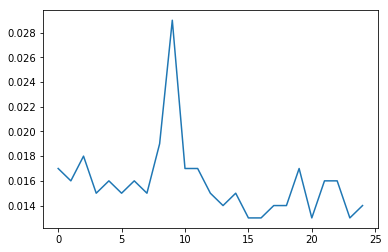

In [20]:
plt.plot(range(25), lista1)
plt.show()

### PrimeQ0 con map

In [21]:
from time import time
lista2 = []
for i in np.arange(25):
    time1 = time()
    dview.map_sync(PrimeQ0, np.arange(25))
    time2 = time()
    lista2.append(time2-time1) 
lista2

[0.05200004577636719,
 0.10599994659423828,
 0.05500006675720215,
 0.05099987983703613,
 0.05200004577636719,
 0.04699993133544922,
 0.046000003814697266,
 0.04800009727478027,
 0.046000003814697266,
 0.04799985885620117,
 0.046000003814697266,
 0.051000118255615234,
 0.04800009727478027,
 0.05299997329711914,
 0.05299997329711914,
 0.05299997329711914,
 0.05299997329711914,
 0.0559999942779541,
 0.053999900817871094,
 0.05000019073486328,
 0.048999786376953125,
 0.05200004577636719,
 0.04900002479553223,
 0.04999995231628418,
 0.051000118255615234]

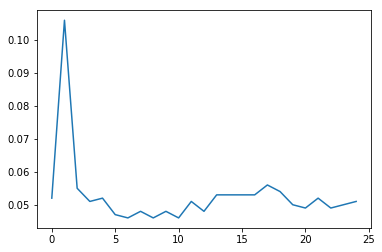

In [22]:
plt.plot(range(25), lista2)
plt.show()

### PrimeQ1 con apply

In [23]:
def PrimeQ1(x):
    import numpy as np
    return np.all(np.array([x%i for i in np.arange(int(x**0.5)+1)[2:]]))

In [24]:
from time import time
lista3 = []
for i in np.arange(25):
    time1 = time()
    c[0].apply_sync(PrimeQ1, 2**i)
    time2 = time()
    lista3.append(time2-time1) 
lista3

[0.01699995994567871,
 0.017000198364257812,
 0.015999794006347656,
 0.015000104904174805,
 0.01399993896484375,
 0.016000032424926758,
 0.018000125885009766,
 0.018999814987182617,
 0.018000125885009766,
 0.016000032424926758,
 0.019999980926513672,
 0.01399993896484375,
 0.016000032424926758,
 0.013000011444091797,
 0.01399993896484375,
 0.01399993896484375,
 0.015000104904174805,
 0.012000083923339844,
 0.014999866485595703,
 0.012000083923339844,
 0.016000032424926758,
 0.016000032424926758,
 0.013000011444091797,
 0.01399993896484375,
 0.01699995994567871]

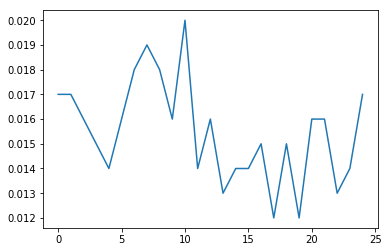

In [25]:
plt.plot(range(25), lista3)
plt.show()

### PrimeQ1 con map

In [26]:
from time import time
lista4 = []
for i in np.arange(25):
    time1 = time()
    dview.map_sync(PrimeQ1, np.arange(25))
    time2 = time()
    lista4.append(time2-time1) 
lista4

[0.05799984931945801,
 0.05300021171569824,
 0.059999942779541016,
 0.07500004768371582,
 0.05099987983703613,
 0.053999900817871094,
 0.05800008773803711,
 0.05500006675720215,
 0.05299997329711914,
 0.05200004577636719,
 0.05200004577636719,
 0.05299997329711914,
 0.053999900817871094,
 0.054000139236450195,
 0.051999807357788086,
 0.051000118255615234,
 0.053999900817871094,
 0.05299997329711914,
 0.05000019073486328,
 0.053999900817871094,
 0.06100010871887207,
 0.05899977684020996,
 0.06400012969970703,
 0.056999921798706055,
 0.05200004577636719]

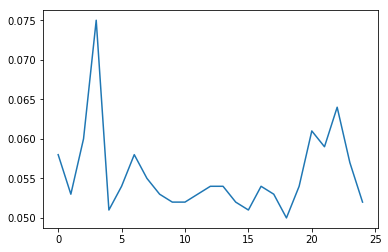

In [27]:
plt.plot(range(25), lista4)
plt.show()

### PrimeQ2 con apply

In [28]:
def PrimeQ2(x):
    import numpy as np
    lista = np.arange(np.int(x**0.5)+1)[2:]
    residuos = np.mod(x, lista)
    return np.all(residuos)

In [29]:
from time import time
lista5 = []
for i in np.arange(25):
    time1 = time()
    c[0].apply_sync(PrimeQ2, 2**i)
    time2 = time()
    lista5.append(time2-time1) 
lista5

[0.017000198364257812,
 0.015999794006347656,
 0.014000177383422852,
 0.01699995994567871,
 0.014999866485595703,
 0.018000125885009766,
 0.014999866485595703,
 0.016000032424926758,
 0.019999980926513672,
 0.015000104904174805,
 0.016000032424926758,
 0.01399993896484375,
 0.015000104904174805,
 0.01399993896484375,
 0.012000083923339844,
 0.01699995994567871,
 0.01399993896484375,
 0.013000011444091797,
 0.016000032424926758,
 0.013000011444091797,
 0.016000032424926758,
 0.014999866485595703,
 0.01699995994567871,
 0.013000011444091797,
 0.013000011444091797]

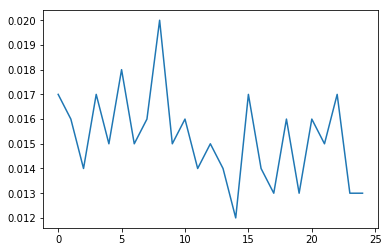

In [30]:
plt.plot(range(25), lista5)
plt.show()

### PrimeQ2 con map

In [31]:
from time import time
lista6 = []
for i in np.arange(25):
    time1 = time()
    dview.map_sync(PrimeQ2, np.arange(25))
    time2 = time()
    lista6.append(time2-time1) 
lista6

[0.05200004577636719,
 0.04999995231628418,
 0.06200003623962402,
 0.06099987030029297,
 0.07000017166137695,
 0.05900001525878906,
 0.053999900817871094,
 0.05200004577636719,
 0.0559999942779541,
 0.05299997329711914,
 0.05299997329711914,
 0.054000139236450195,
 0.10099983215332031,
 0.05500006675720215,
 0.053999900817871094,
 0.0559999942779541,
 0.06000018119812012,
 0.05799984931945801,
 0.05299997329711914,
 0.04800009727478027,
 0.046000003814697266,
 0.04800009727478027,
 0.04799985885620117,
 0.05200004577636719,
 0.04800009727478027]

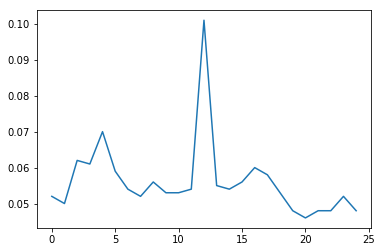

In [32]:
plt.plot(range(25), lista6)
plt.show()

## Gráficas de las tres funciones 

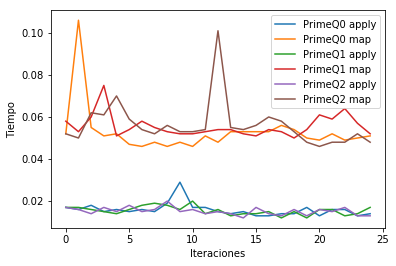

In [35]:
plt.plot(range(25), lista1, label = 'PrimeQ0 apply') 
plt.plot(range(25), lista2, label = "PrimeQ0 map")

plt.plot(range(25), lista3, label = "PrimeQ1 apply")
plt.plot(range(25), lista4, label = "PrimeQ1 map")

plt.plot(range(25), lista5, label = "PrimeQ2 apply")
plt.plot(range(25), lista6, label = "PrimeQ2 map")
plt.legend(loc = "upper right")
plt.xlabel("Iteraciones")
plt.ylabel("Tiempo")
plt.show()

#### Conclusión
Con el map utiliza todos los motores, por lo tanto, hace la operación 4 veces(número de motores corriendo), mientras que con apply hace operación con un solo motor, es decir, una sola vez